In [105]:
# Import the necessary libraries
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
data = pd.read_csv('Car_data.csv')
data.head()

,Kilometeres,Fuel_Type,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,SellingPrice,Age
0,46986,Diesel,3,0,90,1,2000,1165,13500,23
1,94612,Diesel,3,0,90,1,2000,1245,16900,27
2,19700,Petrol,3,0,192,0,1800,1185,21500,27
3,43610,Petrol,3,0,192,0,1800,1185,19950,22
4,34131,Petrol,3,0,192,1,1800,1185,22500,32


In [107]:
data['Fuel_Type'].nunique()

3

In [108]:
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [109]:
data['Fuel_Type'] = data['Fuel_Type'].apply(
    lambda x: 1 if x == 'Petrol' else 2 if x == 'Diesel' else 3 if x == 'CNG' else 0
)


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Kilometeres   1436 non-null   int64
 1   Fuel_Type     1436 non-null   int64
 2   Doors         1436 non-null   int64
 3   Automatic     1436 non-null   int64
 4   HorsePower    1436 non-null   int64
 5   MetallicCol   1436 non-null   int64
 6   CC            1436 non-null   int64
 7   Wt            1436 non-null   int64
 8   SellingPrice  1436 non-null   int64
 9   Age           1436 non-null   int64
dtypes: int64(10)
memory usage: 112.3 KB


In [111]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Kilometeres,1436.0,68533.0,37506.0,1.0,43000.0,63390.0,87021.0,243000.0
Fuel_Type,1436.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0
Doors,1436.0,4.0,1.0,2.0,3.0,4.0,5.0,5.0
Automatic,1436.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
HorsePower,1436.0,102.0,15.0,69.0,90.0,110.0,110.0,192.0
MetallicCol,1436.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
CC,1436.0,1567.0,187.0,1300.0,1400.0,1600.0,1600.0,2000.0
Wt,1436.0,1072.0,53.0,1000.0,1040.0,1070.0,1085.0,1615.0
SellingPrice,1436.0,10731.0,3627.0,4350.0,8450.0,9900.0,11950.0,32500.0
Age,1436.0,56.0,19.0,1.0,44.0,61.0,70.0,80.0


In [112]:
data.isna().sum()

Kilometeres     0
Fuel_Type       0
Doors           0
Automatic       0
HorsePower      0
MetallicCol     0
CC              0
Wt              0
SellingPrice    0
Age             0
dtype: int64

## Correlation matrix

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

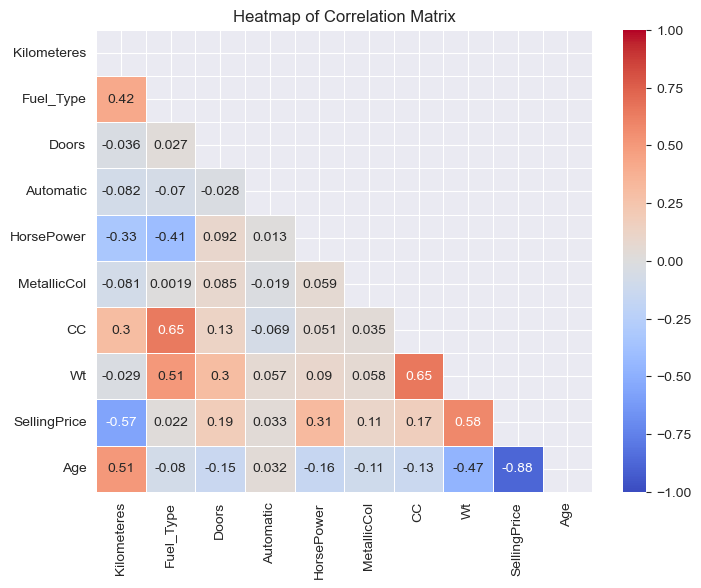

In [114]:

# Calculate the correlation matrix
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, mask=mask)

# Add title
plt.title('Heatmap of Correlation Matrix')

In [115]:
data.columns

Index(['Kilometeres', 'Fuel_Type', 'Doors', 'Automatic', 'HorsePower',
       'MetallicCol', 'CC', 'Wt', 'SellingPrice', 'Age'],
      dtype='object')

## Regression and count plots

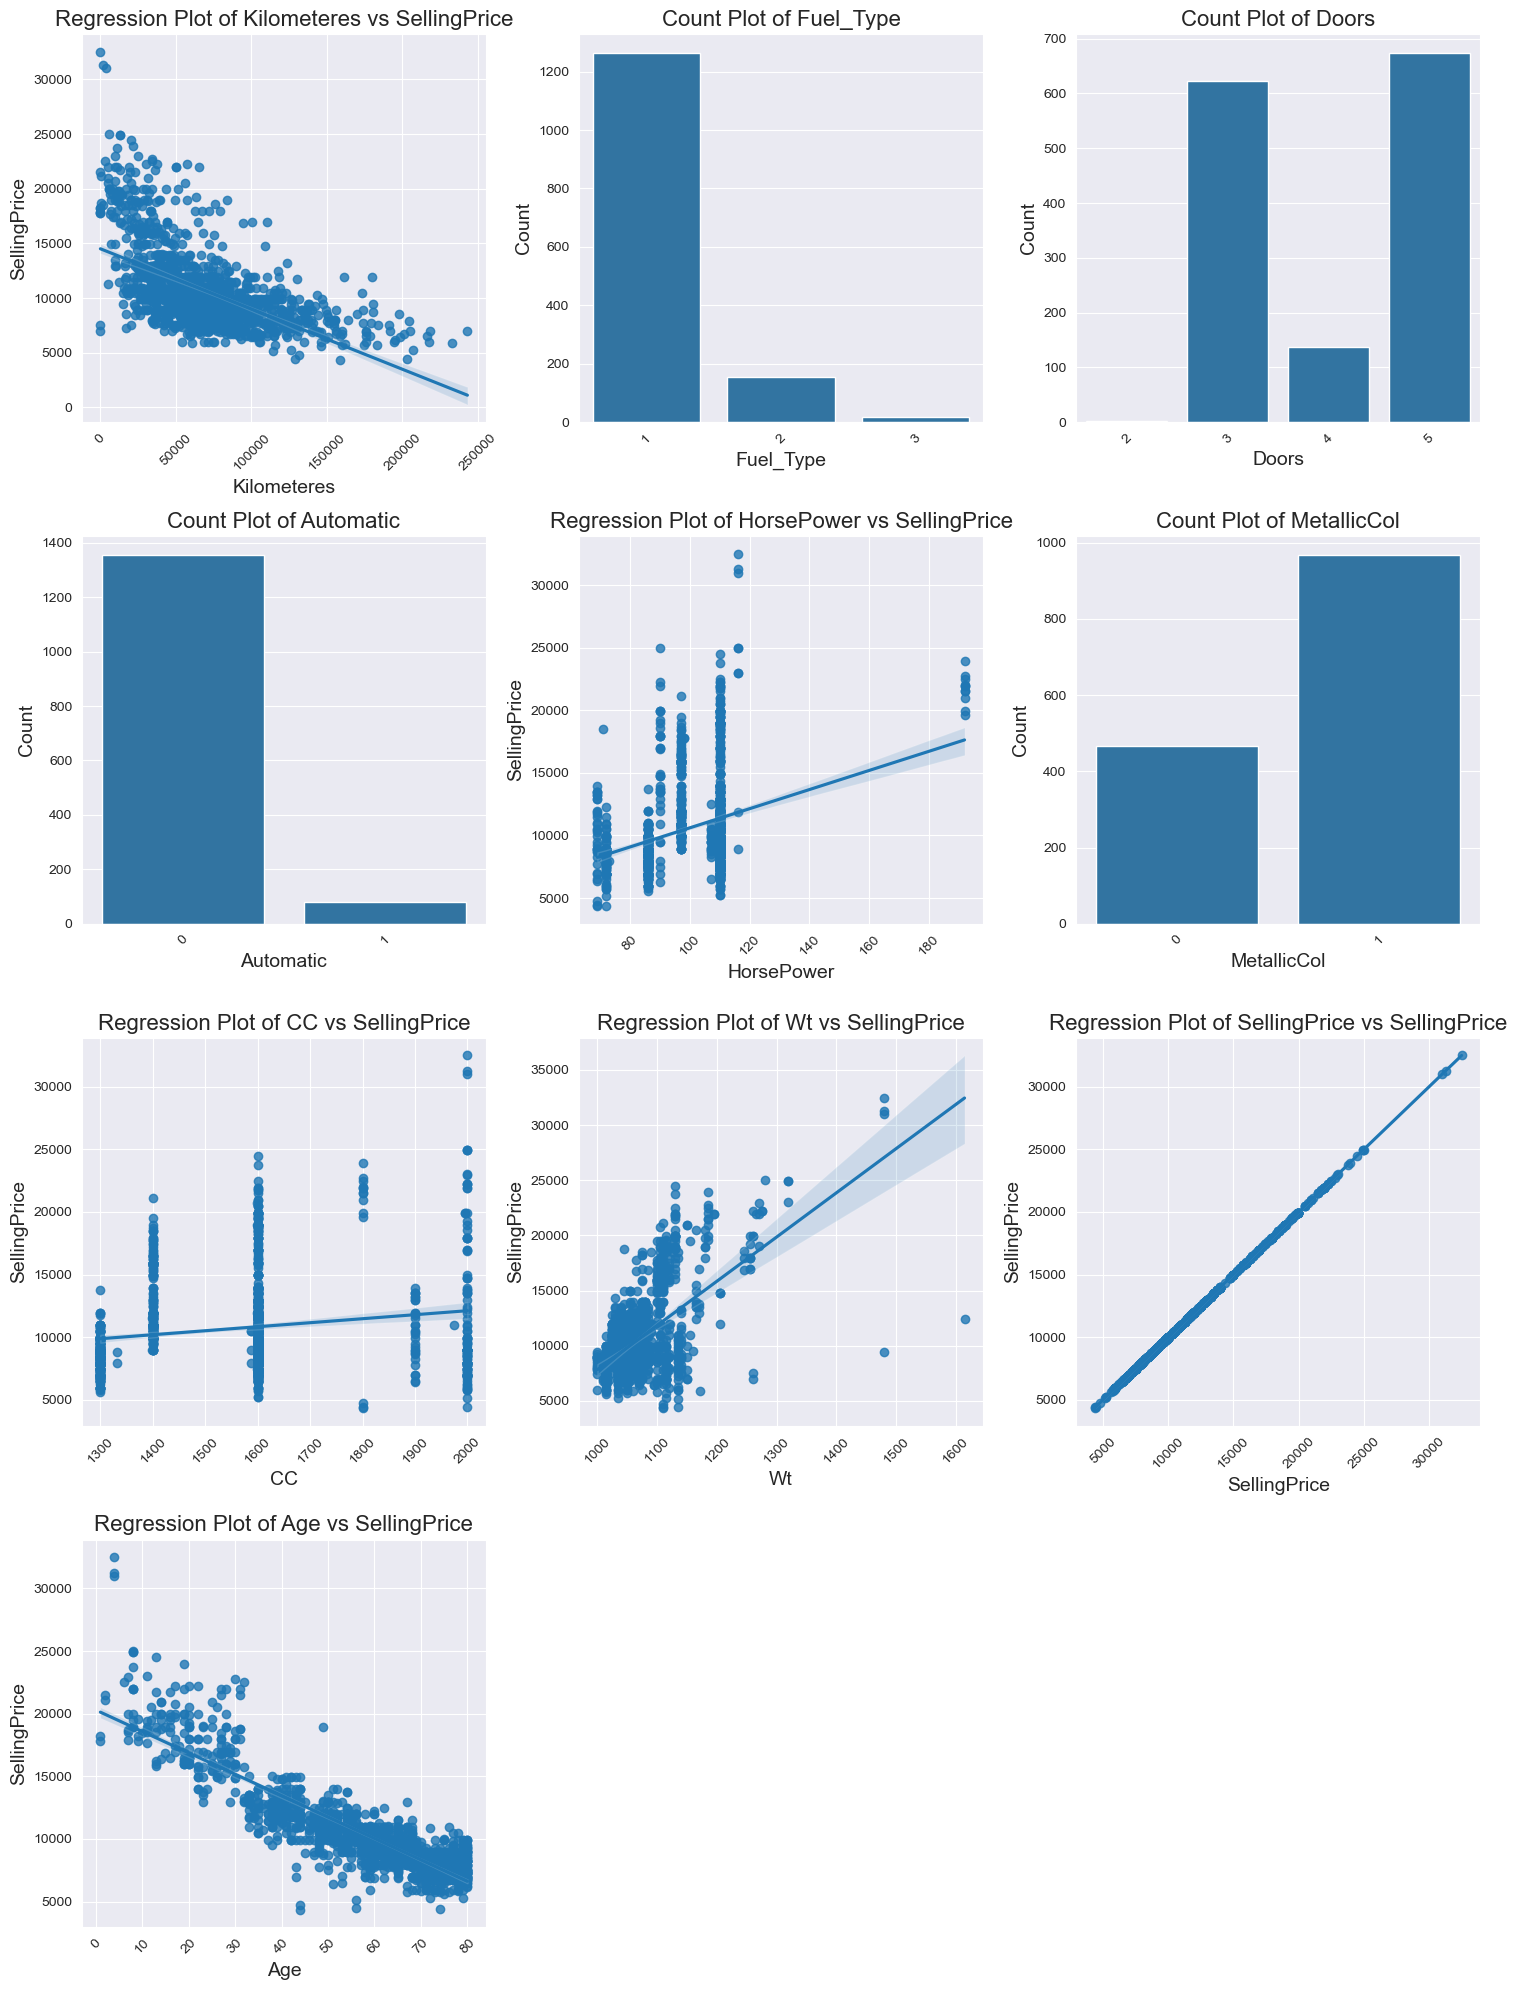

In [117]:
def reg_plots(df, columns):
    """
    Plots count plots for categorical columns and regression plots for numeric columns.

    Parameters:
    - df: DataFrame containing the data
    - columns: List of columns to plot
    """
    n_cols = 3  # Number of columns in the plot grid
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

    # Set plot style
    sns.set_style('darkgrid')  
    plt.figure(figsize=(15, 5 * n_rows)) 

    # Loop through columns and plot based on their data type
    for i, col in enumerate(columns[:n_cols * n_rows]): 
        plt.subplot(n_rows, n_cols, i + 1) 
        
        # Check if the column is categorical or numeric
        if df[col].dtype == 'object' or df[col].nunique() <= 10:
            # Plot count plot for categorical columns
            ax = sns.countplot(data=df, x=col)
            plt.title(f'Count Plot of {col}', fontsize=16)
            plt.xlabel(col, fontsize=14) 
            plt.ylabel('Count', fontsize=14)
        else:
            # Plot regplot for numeric columns
            ax = sns.regplot(x=col, y='SellingPrice', data=df)
            plt.title(f'Regression Plot of {col} vs SellingPrice', fontsize=16)
            plt.xlabel(col, fontsize=14) 
            plt.ylabel('SellingPrice', fontsize=14)
        
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

features = ['Kilometeres', 'Fuel_Type', 'Doors', 'Automatic', 'HorsePower', 
            'MetallicCol', 'CC', 'Wt', 'SellingPrice', 'Age']
reg_plots(data, features)


## Independent and Dependent features

In [119]:
# Get the list of column names
columns = list(data.columns)

# Rearrange: move the second-to-last column to the end
columns = columns[:-2] + [columns[-1], columns[-2]]

# Reorder the DataFrame
data = data[columns]

In [120]:
data.head(2)

,Kilometeres,Fuel_Type,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,Age,SellingPrice
0,46986,2,3,0,90,1,2000,1165,23,13500
1,94612,2,3,0,90,1,2000,1245,27,16900


In [121]:
# Independent features
x = data.iloc[:,:-1]
x.head()

,Kilometeres,Fuel_Type,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,Age
0,46986,2,3,0,90,1,2000,1165,23
1,94612,2,3,0,90,1,2000,1245,27
2,19700,1,3,0,192,0,1800,1185,27
3,43610,1,3,0,192,0,1800,1185,22
4,34131,1,3,0,192,1,1800,1185,32


In [122]:
# Dependent features
y=data.iloc[:,-1]
y.head()

0    13500
1    16900
2    21500
3    19950
4    22500
Name: SellingPrice, dtype: int64

## Train Test Split

In [124]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test= train_test_split(x,y, test_size= 0.3, random_state= 42)

## Standardize the dataset

In [126]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [127]:
x_train= scaler.fit_transform(X_train)

In [128]:
x_test= scaler.transform(X_test)

In [129]:
x_train

array([[ 0.78386866, -0.35533564, -0.04158979, ..., -1.44859651,
        -1.3332433 ,  0.43168706],
       [-1.41304271, -0.35533564, -1.08653339, ..., -0.91105512,
        -0.88124916, -0.42571511],
       [-0.17396159, -0.35533564, -1.08653339, ..., -1.44859651,
        -1.06204681,  0.21733652],
       ...,
       [ 1.2205289 , -0.35533564,  1.0033538 , ...,  0.16402768,
         0.02273913,  0.43168706],
       [ 0.08777079, -0.35533564, -1.08653339, ..., -1.44859651,
        -1.06204681,  1.12832632],
       [-0.27886028, -0.35533564, -1.08653339, ...,  0.16402768,
        -0.15805853,  0.32451179]])

In [130]:
x_test

array([[-0.25248394, -0.35533564, -1.08653339, ...,  0.16402768,
        -0.42925501,  0.4852747 ],
       [ 0.93445116, -0.35533564, -1.08653339, ..., -1.44859651,
        -1.15244564,  0.96756342],
       [-0.45729619, -0.35533564, -0.04158979, ..., -1.44859651,
        -1.3332433 ,  0.27092416],
       ...,
       [-0.36202486, -0.35533564, -1.08653339, ...,  0.16402768,
        -0.42925501,  0.59244997],
       [-0.53624056, -0.35533564,  1.0033538 , ..., -1.44859651,
        -0.7004515 ,  0.96756342],
       [-0.31668394, -0.35533564, -1.08653339, ...,  0.16402768,
        -0.42925501,  0.91397578]])

## Model Training

In [132]:
from sklearn.linear_model import LinearRegression


In [133]:
regression= LinearRegression()
regression

LinearRegression()

In [134]:
regression.fit(x_train, y_train)

LinearRegression()

## Coefficients and the intercept

In [136]:
regression.coef_

array([ -613.70533056,  -155.14710849,   -74.10720546,    36.00599304,
         515.1386342 ,    21.25509443,  -176.03891499,  1193.14193238,
       -2297.90988959])

In [137]:
regression.intercept_

10721.446766169154

### Prediction with Test Data

In [139]:
reg_pred= regression.predict(x_test)

In [140]:
reg_pred

array([ 9586.0100069 ,  6415.37656775,  8577.15846741, 12883.5563712 ,
        7843.57030753, 13839.66252596,  7667.95838384, 19257.44310468,
       10582.08344293, 11774.26837535,  6078.45845274,  8378.86318028,
       11420.49309838, 11620.40404005,  6557.43957327,  8387.1190487 ,
       11602.34742671, 15901.03179198, 17152.36758226,  5946.84812154,
       11472.39869898, 12809.19760737,  9251.50245816, 10291.09724374,
        7031.3031327 , 19472.7770393 ,  7982.77263366,  7219.90438127,
       17197.53638133, 11230.2195012 , 16742.71130381,  9244.45134707,
        7818.87534435,  8904.37114235,  6653.88793503, 11026.64856742,
        7542.56690791,  8348.87646746, 17159.99527567, 10835.30985399,
        8648.09344681,  8346.29712047,  7301.85960405, 13303.8256119 ,
        8299.09450255, 10213.96001229,  6921.5588204 ,  8197.42395628,
        7868.43147242, 10268.12343665, 11072.89442896,  9091.32369613,
       15462.32762991, 14867.28789918,  9595.44625752,  7431.62446679,
      

## Assumptions

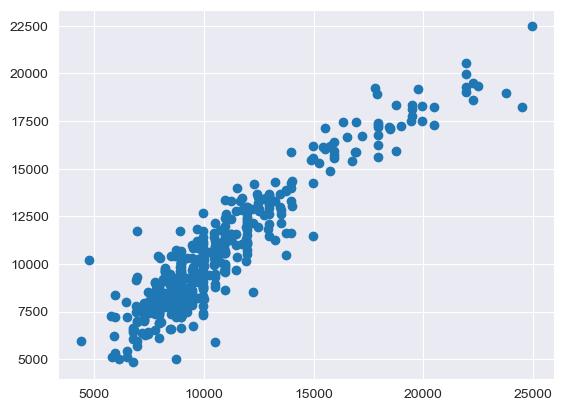

In [142]:
## Scatter plot for prediction
plt.scatter(y_test, reg_pred)

In [143]:
## Residuals
residuals = y_test-reg_pred

In [144]:
residuals

594      363.989993
754      334.623432
630      372.841533
1259    -983.556371
903     1606.429692
           ...     
560    -1927.623812
156     -294.013920
618     -506.956740
934     1247.634617
916     -885.382294
Name: SellingPrice, Length: 431, dtype: float64

<Axes: xlabel='SellingPrice', ylabel='Density'>

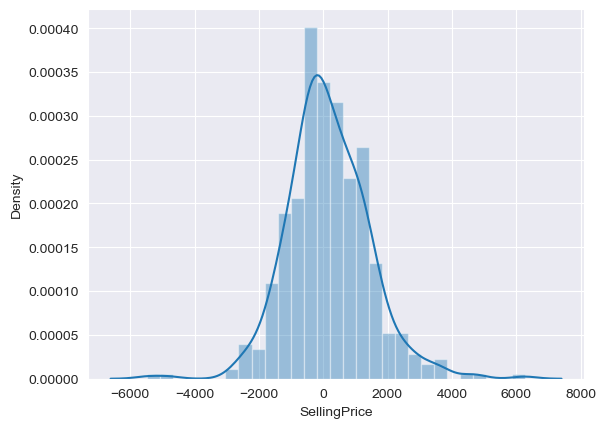

In [145]:
## Plot residuals
sns.histplot(residuals, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

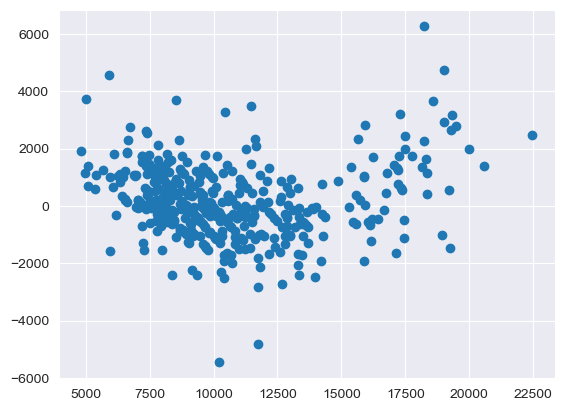

In [146]:
## Scatter plot with respect to prediction and residuals
## Uniform distribution
plt.scatter(reg_pred, residuals)

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f'MAE: {mean_absolute_error(y_test,reg_pred)}')
print(f'MSE: {mean_squared_error(y_test, reg_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, reg_pred))}')

MAE: 963.8504182454417
MSE: 1669867.0368234995
RMSE: 1292.2333523104485


## R square and adjusted R square

$$R^2 = 1 - \frac{SSR}{SST}$$
Where:<br> $R^2$ = Coefficient of determination.<br> $SSR$ = sum of squares of residuals.<br> $SST$ = total sum of squares.

In [149]:
from sklearn.metrics import r2_score

score = r2_score(y_test, reg_pred)
score

0.8673719553512838

## New Data Prediction

In [151]:
# Lets use the same data as our new data to come up with prediction
data.head(2)

,Kilometeres,Fuel_Type,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,Age,SellingPrice
0,46986,2,3,0,90,1,2000,1165,23,13500
1,94612,2,3,0,90,1,2000,1245,27,16900


In [152]:
new_data = data.iloc[:,:-1]
new_data.head(2)

,Kilometeres,Fuel_Type,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,Age
0,46986,2,3,0,90,1,2000,1165,23
1,94612,2,3,0,90,1,2000,1245,27


In [153]:
# Lets take for instance we want to predict the first point of salling price
new_data = new_data.iloc[[0]] 
new_data

,Kilometeres,Fuel_Type,Doors,Automatic,HorsePower,MetallicCol,CC,Wt,Age
0,46986,2,3,0,90,1,2000,1165,23


In [154]:
## Transformation of new data
new_data_scaled = scaler.transform(new_data)  

In [155]:
# Applying the model to predict selling price value 
prediction = regression.predict(new_data_scaled)
prediction

array([16016.38049678])

## Pickling The Model file For Deployment

In [157]:
import pickle

In [158]:
## Coming up with a pickle file for our model and save it in the working dir
pickle.dump(regression, open('regmodel.pkl','wb'))

In [159]:
## We can also load the saved pickle file and use it make our prediciton with the trained model
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [160]:
## Let us make prediction using our model from the pickle file
pickled_model.predict(new_data_scaled)

array([16016.38049678])

In [161]:
## Pickiling scaler for trasformation of new data
pickle.dump(scaler, open('scaling.pkl','wb'))

## Next steps....
-  **Flask:** To serve our model.
-  **Docker:** To containerize the application 
-  **GitHub Actions:** To take care of the CI/CD pipeline
-  **Heroku:** Deployment platform